# Scalar and Vector Fields

In physics, a scalar field associates a scalar value to every point in a space. The scalar may either be a mathematical number or a physical quantity. For example, the temperature at each point in a room is a scalar field: the temperature at each point can be represented by a single number. For example, the function $T(x,y,z)$ might represent the temperature in a room if $x$, $y$, and $z$ are the Cartesian coordinates of a point in the room. The scalar field value $T$ would be a single number at each point in space.  We could have something like:

$$ T(x,y,z) = 20 + 0.5e^{-x^2} + 0.5e^{-y^2} - 0.1z$$

Scalar fields are required to be coordinate-independent, meaning that any two observers using the same units will agree on the value of the scalar field at the same absolute point in space (or spacetime).
 
Other xamples used in physics include the pressure distribution in a fluid, and spin-zero quantum fields, such as the Higgs field. These fields are the subject of scalar field theory.



## Visualizing Scalar Fields

A scalar field can be visualized as a contour plot or as a density plot. A contour plot uses lines to represent constant values of the scalar field. A density plot uses colors to represent the scalar field. The following code shows how to create a contour plot and a density plot of the scalar field $T(x,y,z)$.

```python
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Create a scalar field
def T(x,y,z):
    return 20 + 0.5*np.exp(-x**2) + 0.5*exp(-y**2) - 0.1*z

# Create a grid of points in the x-y plane
x = np.linspace(-100,100,100)
y = np.linspace(-100,100,100)

# Create a meshgrid
X,Y = np.meshgrid(x,y)

# Evaluate the scalar field at the grid points
Z = T(X,Y,0)

# Create a contour plot
plt.contour(X,Y,Z)
plt.show()

# Create a density plot

plt.imshow(Z)
plt.show()
```

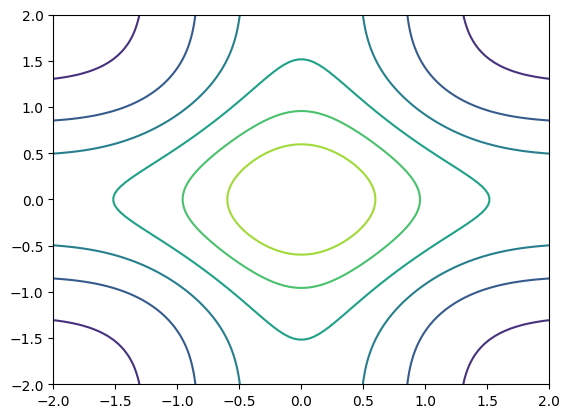

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Create a scalar field
def T(x,y,z):
    return 20 + 0.5*np.exp(-x**2) + 0.5*np.exp(-y**2) - 0.1*z

# Create a grid of points in the x-y plane
x = np.linspace(-2,2,100)
y = np.linspace(-2,2,100)

# Create a meshgrid
X,Y = np.meshgrid(x,y)

# Evaluate the scalar field at the grid points
TZ0 = T(X,Y,0)

# Create a contour plot
plt.contour(X,Y,TZ0)
plt.show()

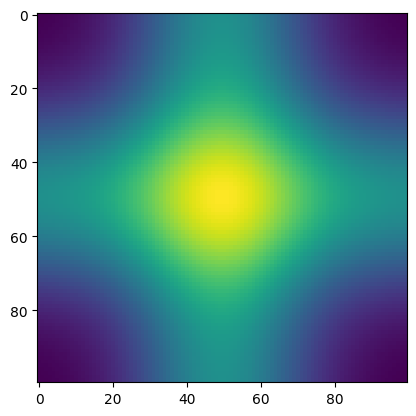

In [4]:
# Create a density plot

plt.imshow(TZ0)
plt.show()